In [6]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten,Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import cifar100
from keras.utils import np_utils
# download the dataset from source and divide into training and test set
(xtr, ytr), (xt, yt) = datasets.cifar100.load_data()

In [7]:
classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 
           'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
           'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest',
           'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 
           'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 
           'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 
           'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 
           'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [8]:
# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Check the shape of the array
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format
print(type(x_train))
print(type(y_train))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
# Import libraries for preprocessing images
from tensorflow.keras.utils import to_categorical

# Normalize images
train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

# Transform labels to one hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [10]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()
# Stack 1
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Stack 2
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100, activation='softmax'))

model.summary()


# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 256)       590080    
                                                      

In [11]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [12]:
# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100, 
          epochs=700,
          validation_data=(X_validation, y_validation),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/700
100/100 [==============================] - 23s 112ms/step - loss: 4.4831 - acc: 0.0283 - val_loss: 4.3601 - val_acc: 0.0537
Epoch 2/700
100/100 [==============================] - 8s 81ms/step - loss: 4.2717 - acc: 0.0581 - val_loss: 4.0961 - val_acc: 0.0903
Epoch 3/700
100/100 [==============================] - 8s 82ms/step - loss: 4.0859 - acc: 0.0897 - val_loss: 3.9709 - val_acc: 0.1038
Epoch 4/700
100/100 [==============================] - 8s 80ms/step - loss: 3.9783 - acc: 0.1011 - val_loss: 3.8114 - val_acc: 0.1338
Epoch 5/700
100/100 [==============================] - 10s 102ms/step - loss: 3.8645 - acc: 0.1233 - val_loss: 3.7538 - val_acc: 0.1446
Epoch 6/700
100/100 [==============================] - 8s 81ms/step - loss: 3.7754 - acc: 0.1412 - val_loss: 3.6354 - val_acc: 0.1665
Epoch 7/700
100/100 [==============================] - 8s 80ms/step - loss: 3.7301 - acc: 0.1436 - val_loss: 3.5552 - val_acc: 0.1833
Epoch 8/700
100/100 [==============================] - 8s 

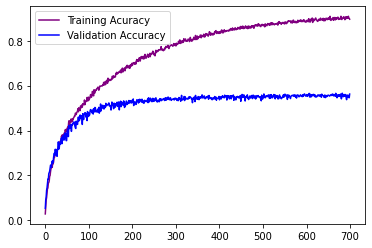

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure()
plt.plot(acc,color = 'purple',label = 'Training Acuracy')
plt.plot(val_acc,color = 'blue',label = 'Validation Accuracy')
plt.legend()

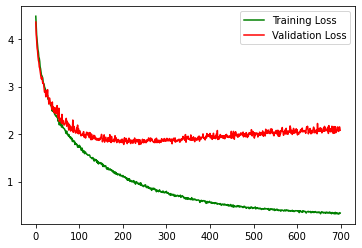

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [18]:
score = model.evaluate(X_validation, y_validation, verbose = 0)
print('Sai số kiểm tra là : ', score[0])
print('độ chính xác kiểm tra',score[1])
#lưu lại mô hình 
model.save('CNN_cifar100_final.h5')

Sai số kiểm tra là :  2.079936981201172
độ chính xác kiểm tra 0.5623999834060669


In [23]:
from google.colab import files
upload = files.upload()

Saving download (4).jpg to download (4).jpg


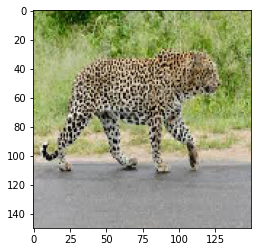

this is: leopard


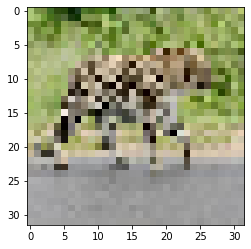

In [24]:
from keras import models
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
model100=models.load_model('CNN_cifar100_final.h5')

img2 = load_img('download (4).jpg', target_size=(150,150))
plt.imshow(img2)
plt.show()

img = load_img('download (4).jpg', target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/ 255
print('this is:',classes[np.argmax(model100.predict(img),axis=1)[0]])